# Frequency Analysis

Different languages have a regular occurence of letters. We can find out what they are by looking at a selection of literary works.

> Note

In [2]:
%matplotlib inline
import string
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(style="whitegrid", color_codes=True)

## Reading the book into memory

We can use Python's `open()` function to load the content of the book.

There are metadata at the beginning, and license at the end, which we will strip out.

In [6]:
with open('les-miserables.txt', encoding='utf-8') as book:
    # Print the book line by line
    for i, line in enumerate(book):
        print(line)
        
        # Look at only the first 5 lines for now, because the book can be very large
        if i > 5:
            break

﻿The Project Gutenberg EBook of Les Misérables, by Victor Hugo



This eBook is for the use of anyone anywhere at no cost and with almost

no restrictions whatsoever. You may copy it, give it away or re-use

it under the terms of the Project Gutenberg License included with this

eBook or online at www.gutenberg.org





## Trim out the metadata and the license

...

In [4]:
with open('les-miserables.txt', encoding='utf-8') as book:
    
    # Strip out the metadata at the start
    for line in book:
        if line.startswith('*** START OF THIS PROJECT GUTENBERG'):
            break
    
    # Look at only the first 10 lines for now
    for i, line in enumerate(book):
        # At this point, the book is ready to be analysed
        print(line)
        if i > 10:
            break
        
        # At this line, that is the end of the book
        if line.startswith('*** END OF THIS PROJECT GUTENBERG'):
            break







Produced by Judith Boss and David Widger







LES MISÉRABLES



By Victor Hugo



Translated by Isabel F. Hapgood



## The final code

This is the code to do frequency analysis in whole as a function

In [86]:
def word_analysis(filename):

    title = ''
    with open(filename, encoding='utf-8') as book:

        # Ignore Project Gutenberg metadata
        for i, line in enumerate(book):
            if line.startswith('Title:'):
                title = line[6:]
            if line.startswith('*** START OF THIS PROJECT GUTENBERG'):
                break

        # Set up letter counter
        letter_frequencies = {}
        for letter in string.ascii_uppercase:
            letter_frequencies[letter] = 0

        # Analyse the book
        for i, line in enumerate(book):
            for char in line:
                if char in string.ascii_letters:
                    uppercase = char.upper()
                    letter_frequencies[uppercase] += 1

            if line.startswith('*** END OF THIS PROJECT GUTENBERG'):
                break

        # Present the analysis
        # print(letter_frequencies)

        total = sum(letter_frequencies.values())

        letter_percentages = {}
        for letter, count in letter_frequencies.items():
            letter_percentages[letter] = count / total * 100

        # Packaging the data for plotting
        data = {
            'letters': list(letter_percentages.keys()),
            'frequencies': list(letter_frequencies.values()),
            'percentages': list(letter_percentages.values()),
        }

        # Setting up a barplot
        plt.figure()
        plot = sns.barplot(x='letters', y='percentages', data=data, palette='spring')
        plot.set_title("{0}\ntotal {1} characters".format(title, total))
        plot.set_xlabel('Letters')
        plot.set_ylabel('Percentages')

        # Format percentages on y axis
        fmt = '%.0f%%'
        yticks = mtick.FormatStrFormatter(fmt)
        plot.yaxis.set_major_formatter(yticks)

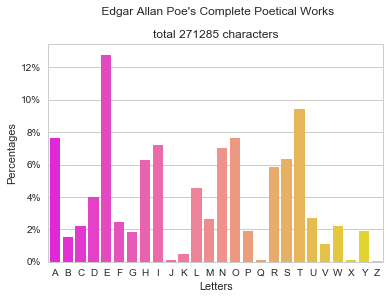

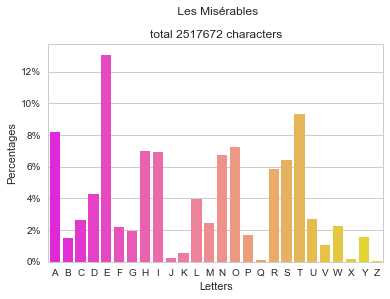

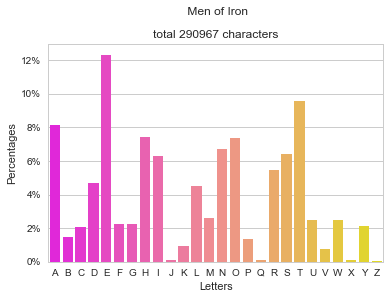

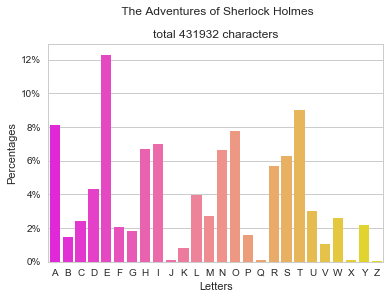

In [87]:
for root, dirs, files in os.walk('.'):
    for f in files:
        if f.endswith('.txt'):
            word_analysis(f)
    break